In [246]:
# Import necessary libraries

# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Classifier libraries (ML Algorithms)
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evalution metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [303]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Miss-Kihara\Desktop\Week 9 (Python)\STARK HEALTH CLINIC - DIABETES PREDICTION PROJECT\diabetes_prediction_dataset.csv")
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### Observations
* We have three datatypes, i.e Object, float and integer

In [108]:
# Checking for missing values
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

#### Observations
* There are no missing data

In [109]:
# #statistical analysis of the data
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Exploratory Data Analysis

In [110]:
#explore the Gender and the Smoking History level features
print(f"Total categories in Gender: {data.gender.value_counts()}\n")
print(f"Total categories in Smoking History:{data.smoking_history.value_counts()}\n")

Total categories in Gender: gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

Total categories in Smoking History:smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64



#### Observations 
* According to the data, 18 patients did not register the gender they belong to.
 

In [111]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

#### Univariate Analysis

###### Numerical variables

In [112]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

Flattening the grid of subplots simplifies your task by turning a complex grid into a simple list. This makes it easier to manage and work with each subplot one at a time. 
The visualization shows the distribution of numerical columns of the dataset.

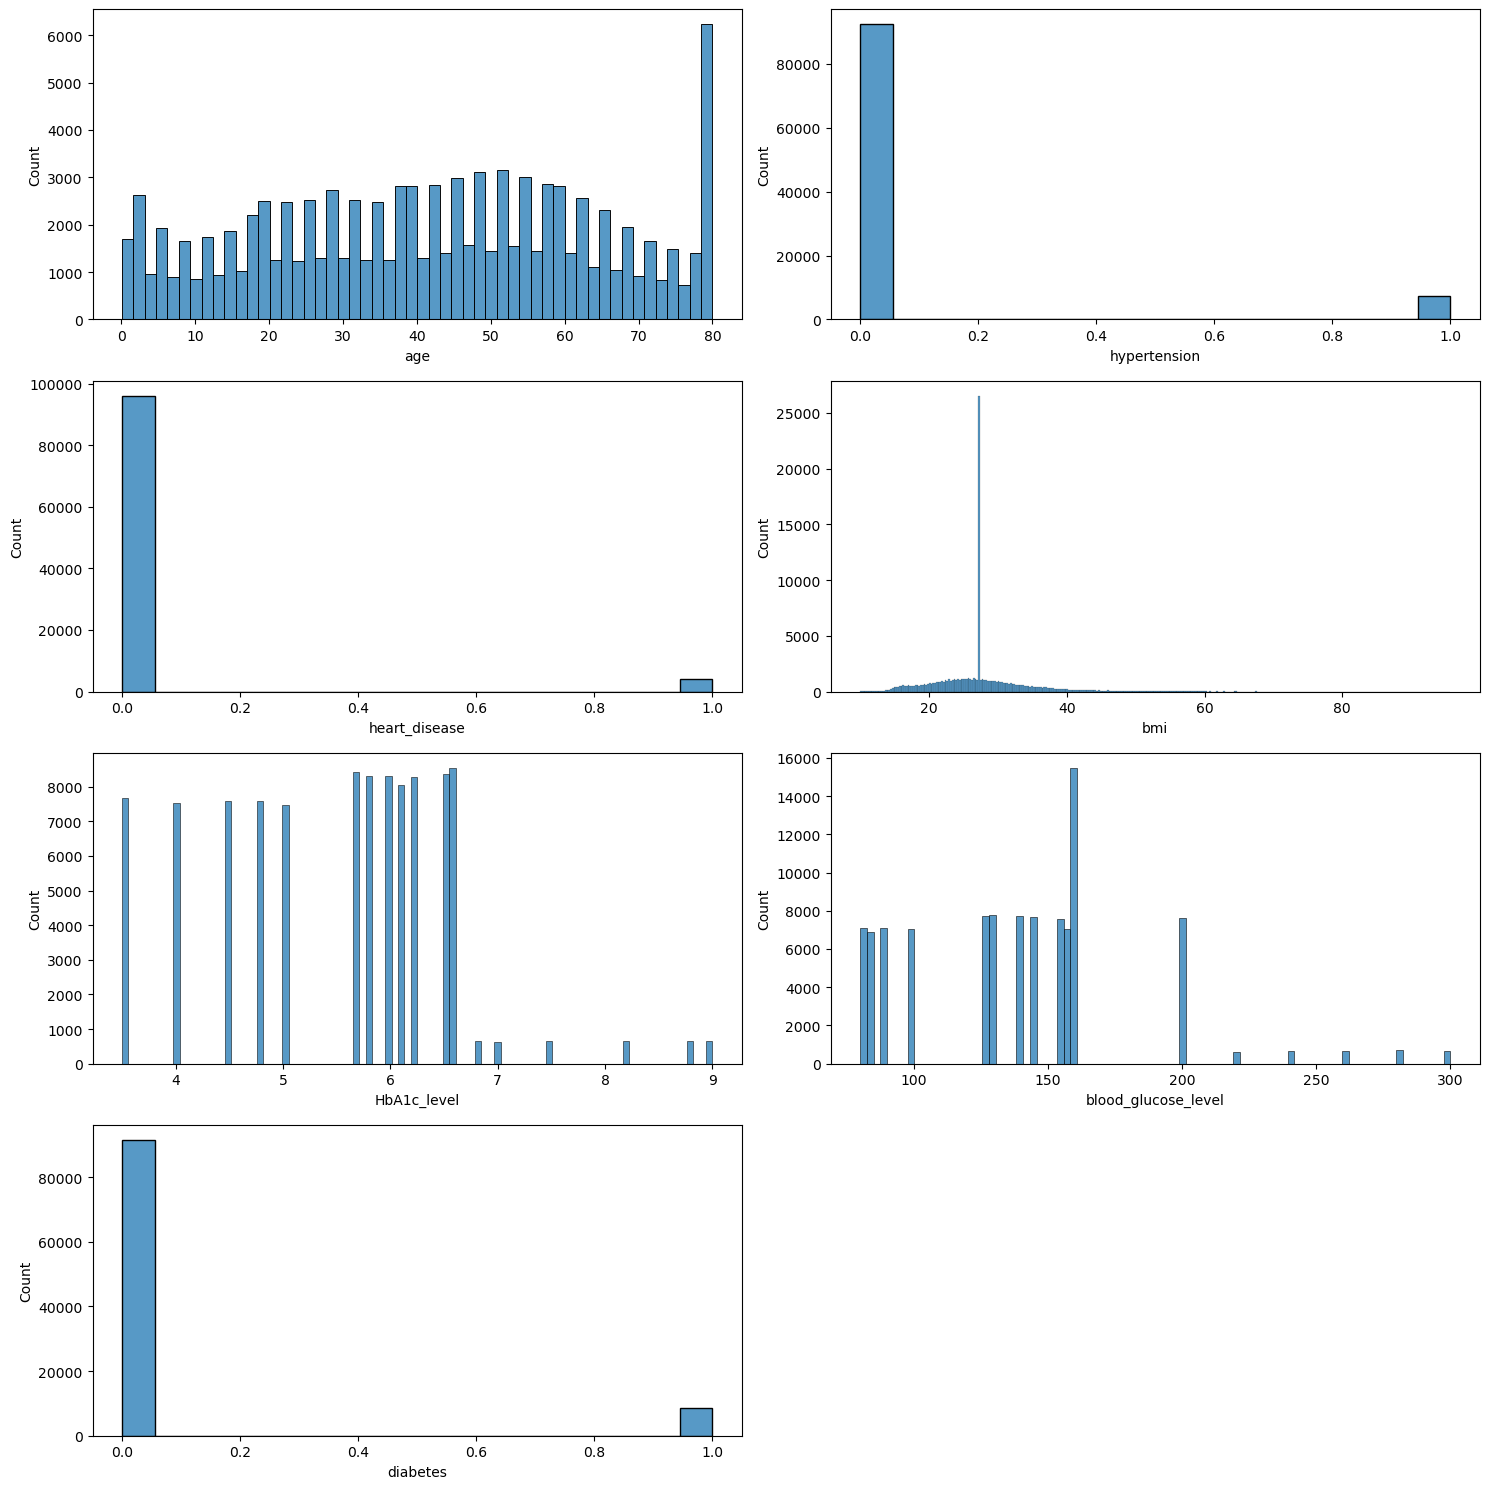

In [113]:
fig, axes = plt.subplots(nrows= 4, ncols=2, figsize = (15,15))

position = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(data = data[col].dropna(), ax = position[i])

# Turn off any unused subplots
for j in range(i + 1, len(position)):
    position[j].axis('off')
    
plt.tight_layout()

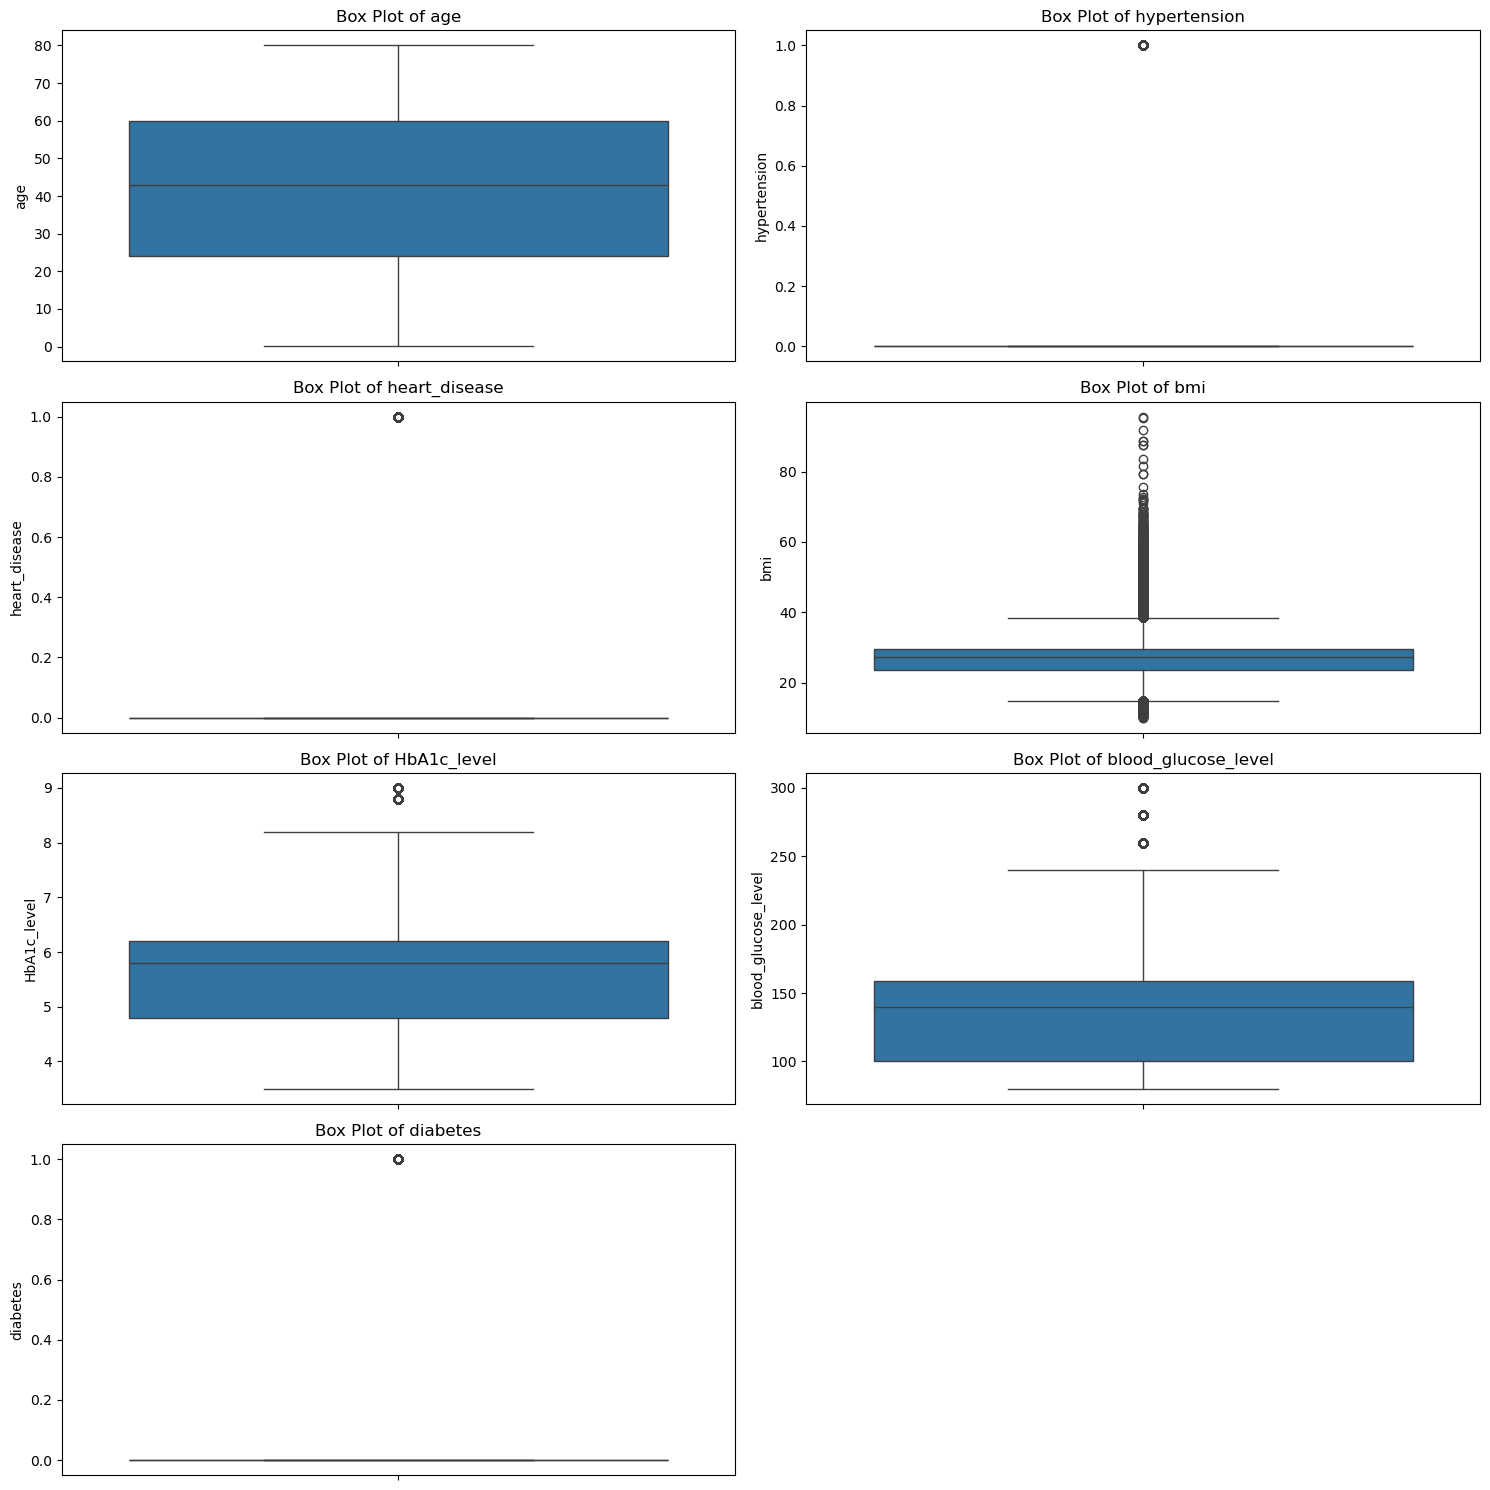

In [114]:
#checking for outliers
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Flatten the axes array for easy iteration
position = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=data[col].dropna(), ax=position[i])
    position[i].set_title(f'Box Plot of {col}')


# Turn off any unused subplots
for j in range(i + 1, len(position)):
    position[j].axis('off')
    
plt.tight_layout()

###### Categorical variables
Bar plots for categorical variables provide a good visual representation of their distribution.

In [115]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['gender', 'smoking_history'], dtype='object')

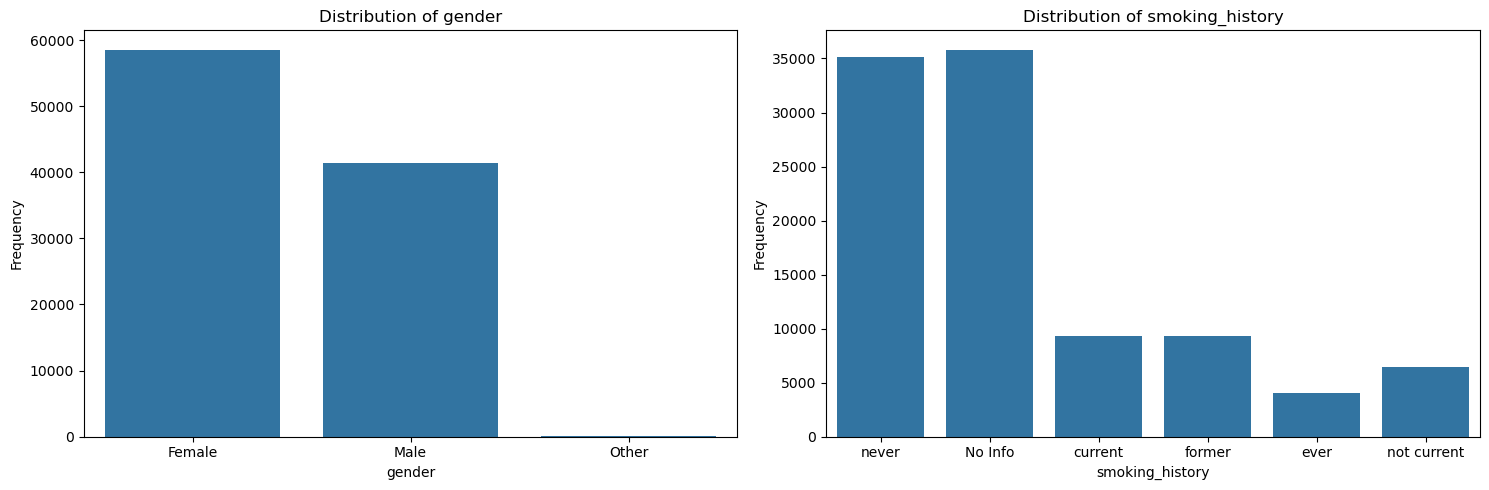

In [125]:
# Create subplots for bar plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

#Flatten the axes array
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(categorical_columns):
    sns.countplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
          
# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


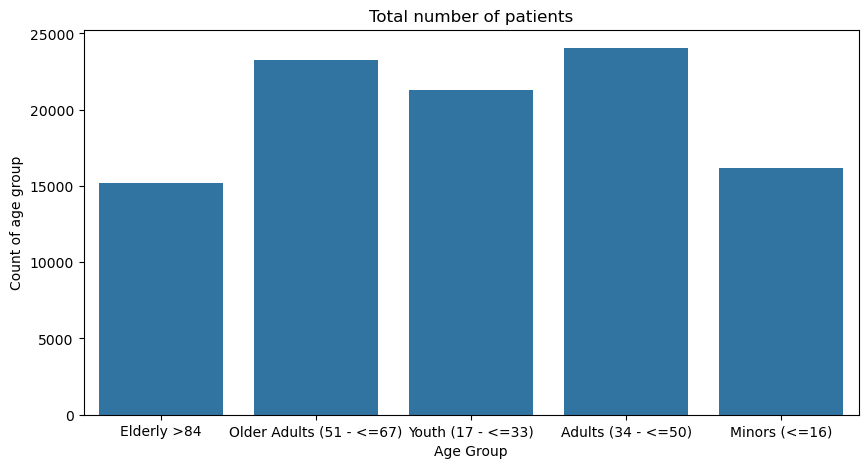

In [139]:
#age bracket
def age_bracket(age):
    if age <=16:
        return 'Minors (<=16)'
    elif age <=33:
        return 'Youth (17 - <=33)'
    elif age <=50:
        return 'Adults (34 - <=50)'
    elif age <=67:
        return 'Older Adults (51 - <=67)'
    else:
        return 'Elderly >84'

data['age_bracket'] = data['age'].apply(age_bracket)

#investigatig the age group of the patients
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='age_bracket')
plt.xlabel('Age Group')
plt.ylabel('Count per age group')
plt.title('Total number of patients');

#### Observations:
According to the observation, the distribution appears positively skewed indicating that younger and middle-aged patients dominate with the highest number of diabetes diagnoses, until a significant spike at age 80, resulting in a longer tail extending toward the right. Also it is noted that there are no outliers despite the spike at age 80
Diabetes tends to be more prevalent in middle-aged and older adults due to lifestyle, genetics, and age-related metabolic changes.
The younger population contributes fewer cases, as expected, but may represent Type 1 cases.


target
No     91500
Yes     8500
Name: count, dtype: int64


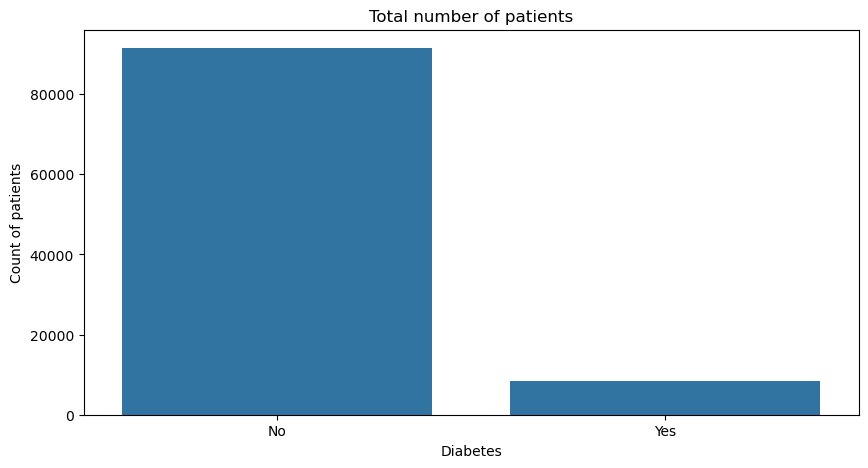

In [302]:
#Data Visualization
# diabetes: have diabetes or not (1=yes, 0=no)
def target(db):
    if db == 1:
        return 'Yes'
    else:
        return 'No'

data['target'] = data['diabetes'].apply(target)

#Total number of patients in each category
print(data['target'].value_counts())

#investigating the gender of the patients
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='target')
plt.xlabel('Diabetes')
plt.ylabel('Count of patients')
plt.title('Total number of patients');

### Explanations:
The observations clearly show that those diagnosed are less than those who were not. This looks good but can also be attributed to various factors such as the location of the hospital, maybe it is not easily accessible. Another factor could be people are not willing to go and get tested. Also, there could be insufficient insulin test kits for testing, therefore, when people go for checkups, the kits are unavailable.  

## Bivariate Analysis
Relationship between two variables.

In [144]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'sex',
       'target', 'age_bracket'],
      dtype='object')

#### Numerical vs. Numerical
Scatter plots help visualize the relationship between two numerical variables.

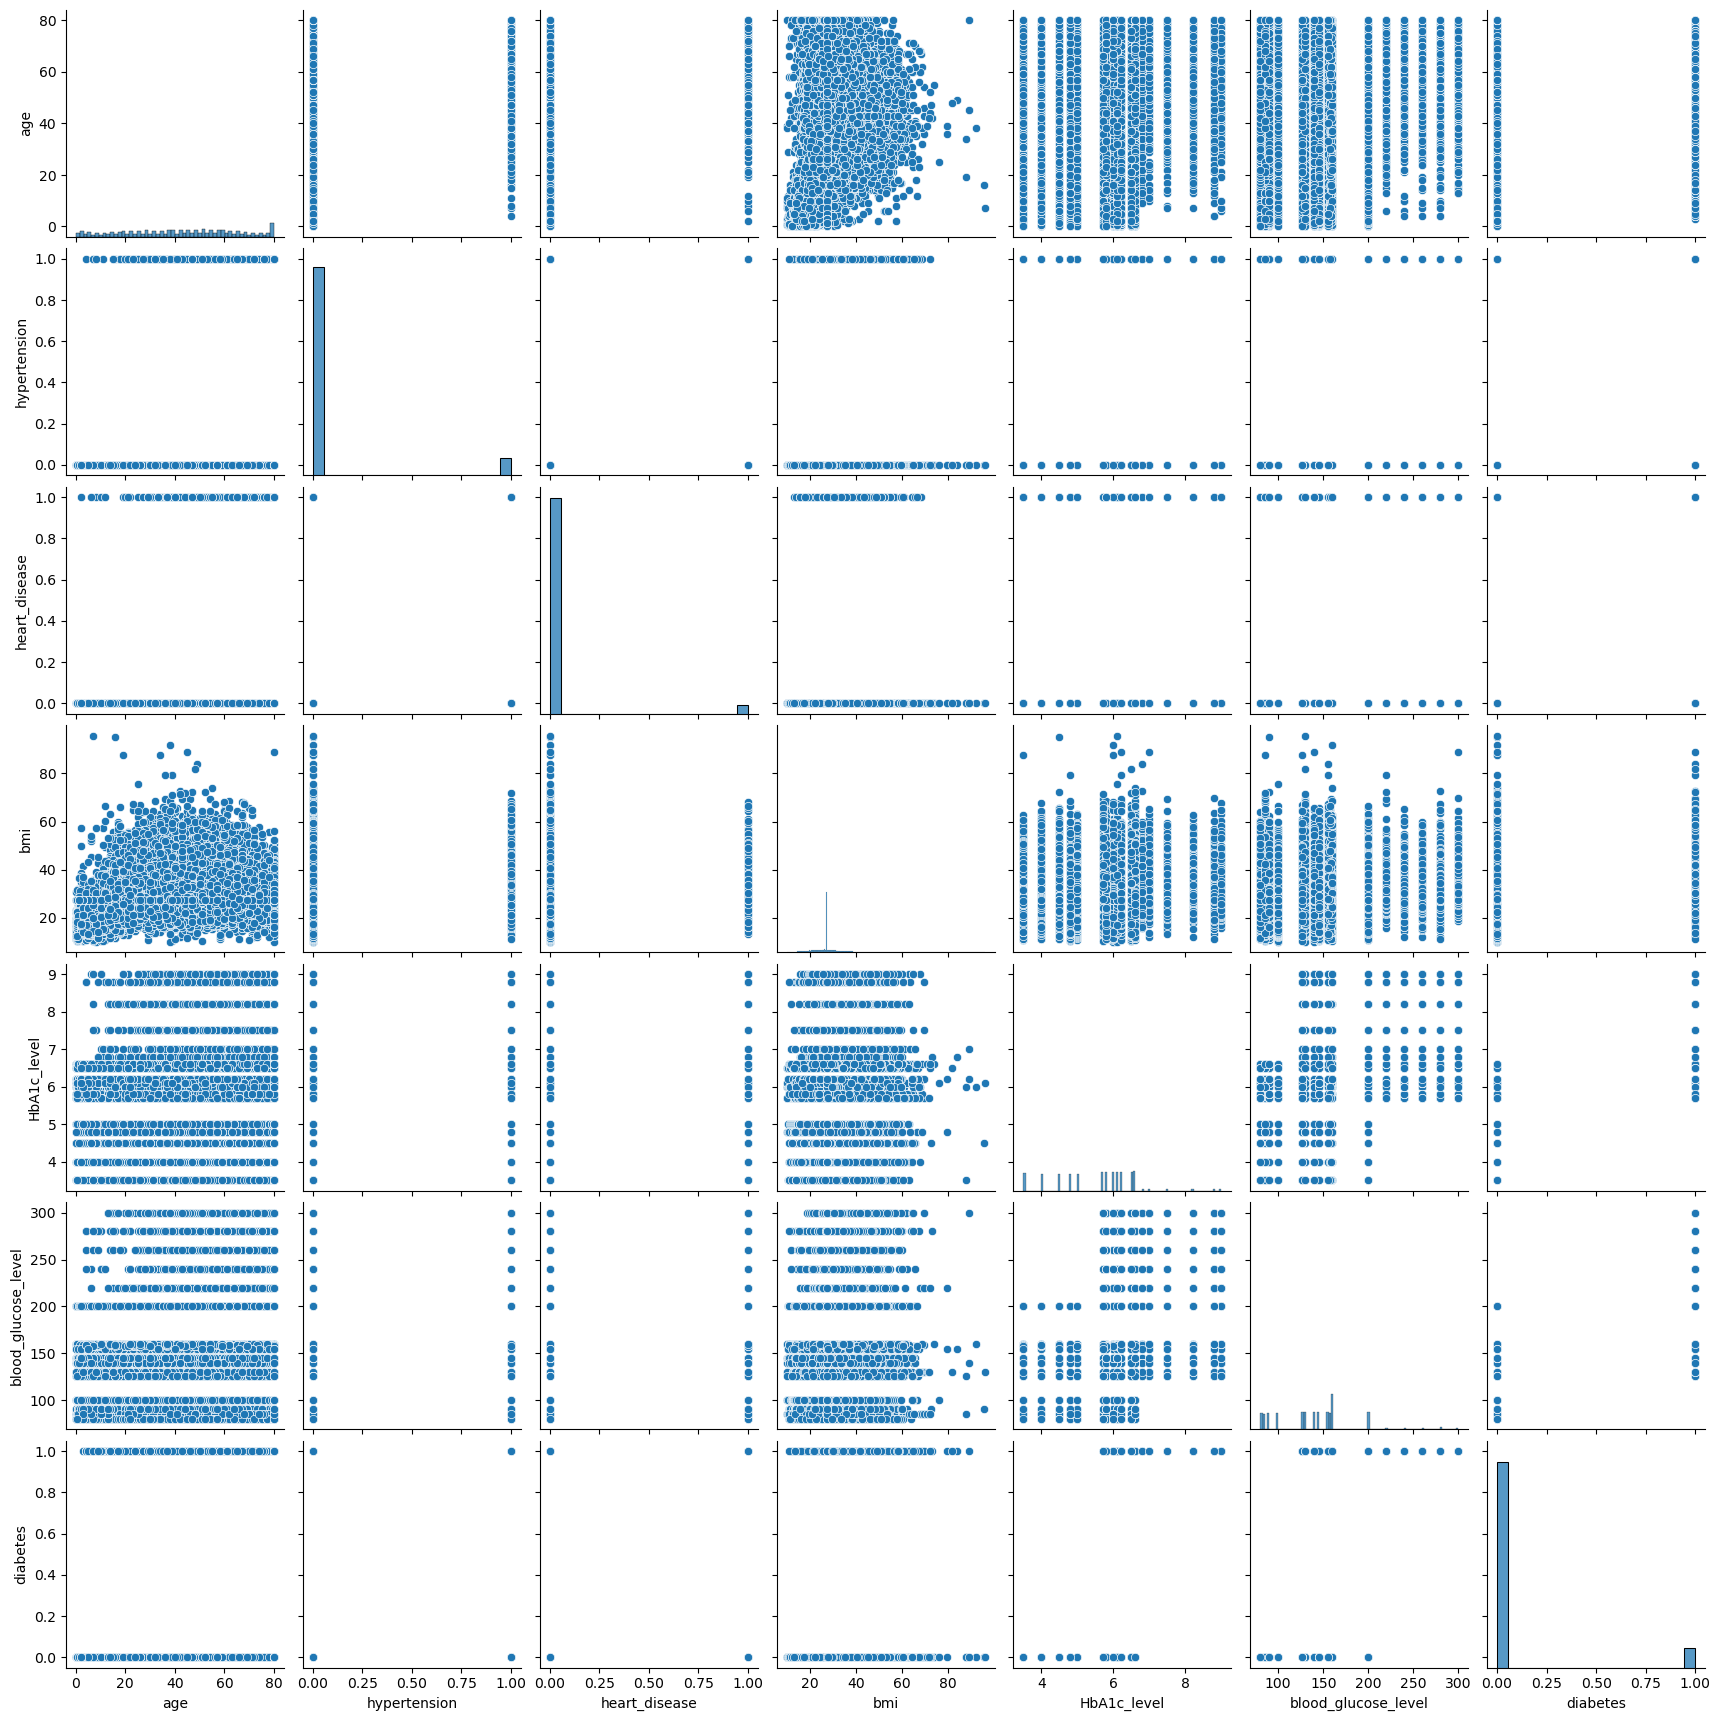

In [128]:
# Create a pairplot for numerical columns
sns.pairplot(data[numerical_columns])
plt.show()

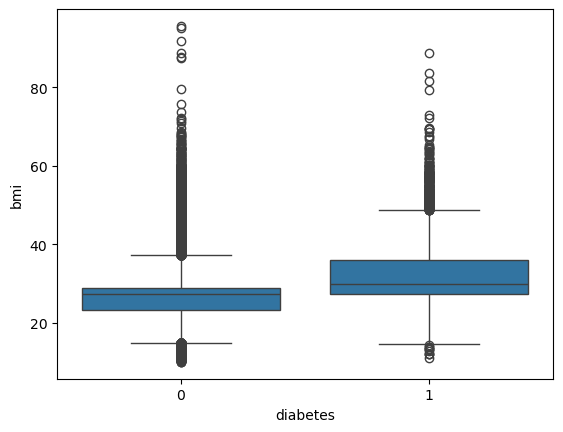

In [290]:
#Investigating BMI of patients by the target feature
sns.boxplot(x='diabetes', y='bmi', data=data)
plt.show()

### Explanation
From the observation, we can see that patients who have a higher bmi are more likely to be diagnosed with diabetes, supporting the relationship between obesity and diabetes.

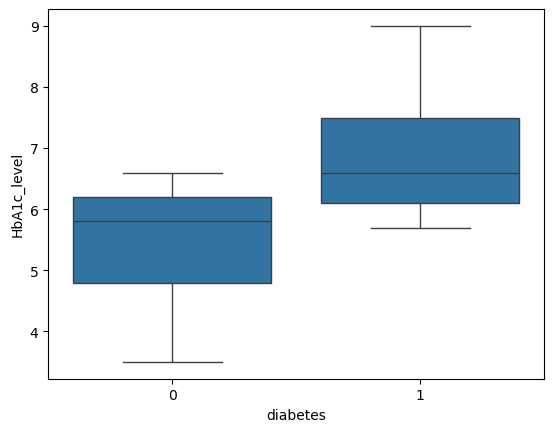

In [292]:
#Investigating HbA1c_level of patients by the target feature
sns.boxplot(x='diabetes', y='HbA1c_level', data=data)
plt.show()

### Explanation
HbA1c is an average blood glucose (sugar) levels for the last two to three months.
HbA1c is a key diagnostic marker for diabetes. According to the observation above, patients with an HbA1c level of above 6.5 are more likely to be diagnosed with diabetes than those with a lower HbA1c level. Therefore HbA1c levels are an effective feature for distinguishing between patients with and without diabetes. 

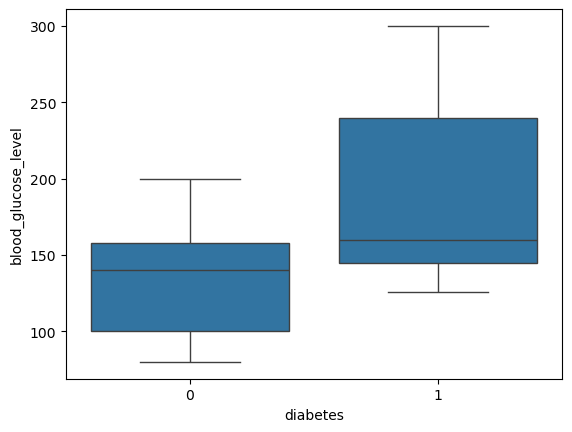

In [293]:
#Investigating blood_glucose_level of patients by the target feature
sns.boxplot(x='diabetes', y='blood_glucose_level', data=data)
plt.show()

### Explanation
From the observation, patients who were not diagnosed with diabetes have glucose levels within a typical range, while those diagnosed with diabetes exhibited much higher levels. Therefore blood glucose levels are a distinguishing feature between diabetic and non-diabetic patients.

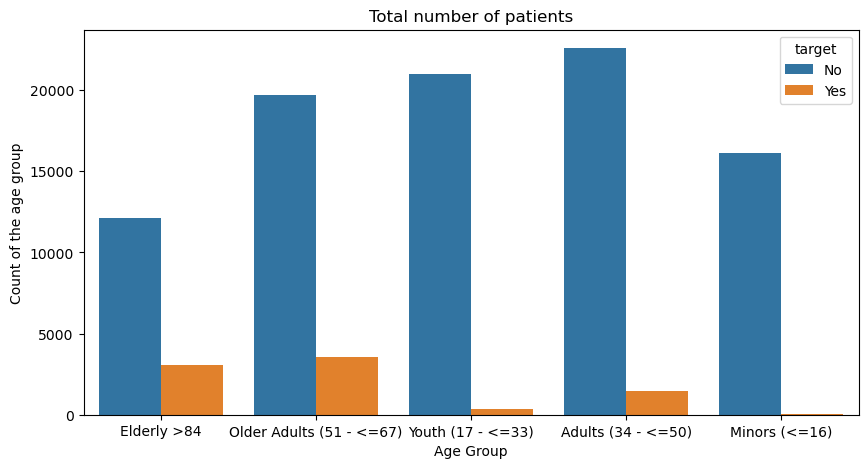

In [140]:
#Investigating the age group of patients by the target feature
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='age_bracket', hue='target')
plt.xlabel('Age Group')
plt.ylabel('Count of the age group')
plt.title('Total number of patients');

### Explanation:
According to the observation, diabetes tends to be more prevalent at ages 51 to 67 and the elderly due to lifestyle, genetics, and age-related metabolic changes. It can also be attributed to the fact that the elderly do not go for checkups anymore or have insulin resistance. As expected, the minors contribute fewer cases but may represent Type 1 cases.

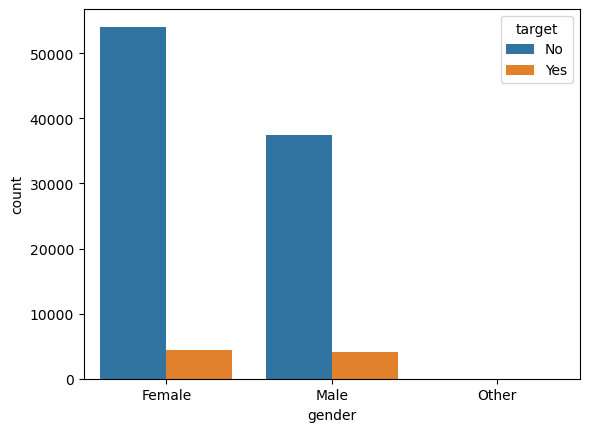

In [142]:
#Investigating the gender of patients by the target feature
sns.countplot(data = data, x = 'gender', hue= 'target');

In [301]:
crosstab = pd.crosstab(data['diabetes'],data['gender'])
crosstab

gender,Female,Male,Other
diabetes,,,
0,54091,37391,18
1,4461,4039,0


### Explanations
From the observation above, the number of female patients diagnosed with diabetes are slightly higher than that of male patients. We can also note females have a high count. This can be attributed to the fact that females tend to visit hospitals or go for checkups more often than males, therefore that can be the reason why we have more females with diabetes than males. 

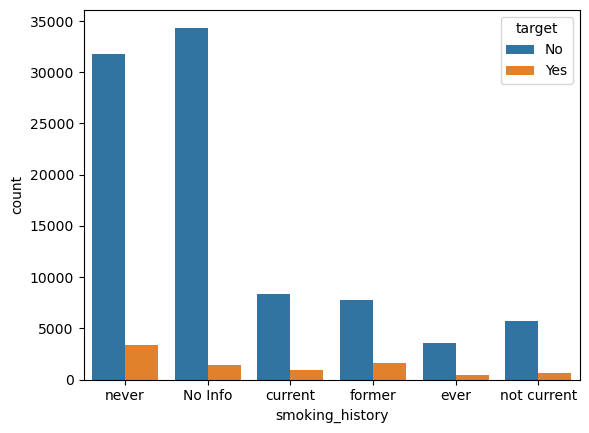

In [143]:
#Investigating the smoking history of patients by the target feature
sns.countplot(data = data, x = 'smoking_history', hue= 'target');

## Multivariate Analysis
It explores the relationships between three or more variables.

In [158]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'sex',
       'target', 'age_bracket'],
      dtype='object')

In [211]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,sex,target,age_bracket
0,Female,80.0,0,1,never,25.19,6.6,140,0,Other,No,Elderly >84
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Other,No,Older Adults (51 - <=67)
2,Male,28.0,0,0,never,27.32,5.7,158,0,Other,No,Youth (17 - <=33)
3,Female,36.0,0,0,current,23.45,5.0,155,0,Other,No,Adults (34 - <=50)
4,Male,76.0,1,1,current,20.14,4.8,155,0,Other,No,Elderly >84


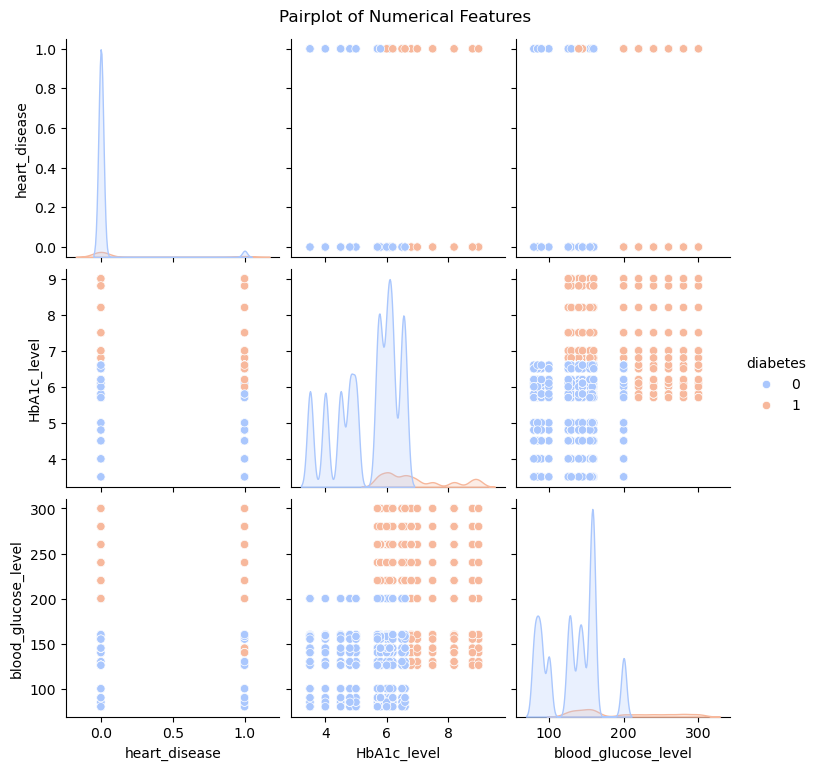

In [149]:
# Pair plot
# A pairplot shows pairwise relationships in a dataset.
sns.pairplot(data[['heart_disease', 'HbA1c_level', 'blood_glucose_level', 'diabetes']], hue='diabetes', palette='coolwarm')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

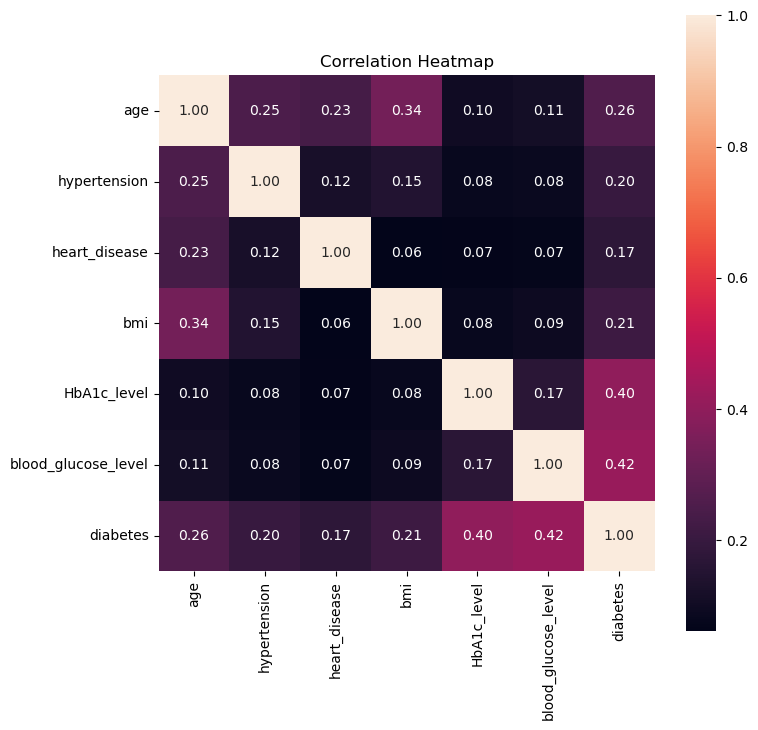

In [305]:
# Correlation between target feature and other variables
num_data = data.select_dtypes(include = 'number')
plt.figure(figsize=(8,8))
plt.title('Correlation Heatmap')
hm = sns.heatmap(num_data.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10})

In [212]:
# Create a copy of your dataset
data1 = data[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level']]

label = data[['diabetes']]

In [202]:
data1.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
dtype: object

In [213]:

#Dealing with outliers 
#Normalize the data

scaler = MinMaxScaler()
data1['Scaled_bmi'] = scaler.fit_transform(data1[['bmi']])
data1['Scaled_HbA1c_level'] = scaler.fit_transform(data1[['HbA1c_level']])
data1['Scaled_blood_glucose_levell'] = scaler.fit_transform(data1[['blood_glucose_level']])

data1.drop(['bmi','HbA1c_level','blood_glucose_level'], axis=1, inplace=True)
data1.head()


,gender,age,hypertension,heart_disease,smoking_history,Scaled_bmi,Scaled_HbA1c_level,Scaled_blood_glucose_levell
0,Female,80.0,0,1,never,0.177171,0.563636,0.272727
1,Female,54.0,0,0,No Info,0.202031,0.563636,0.000000
2,Male,28.0,0,0,never,0.202031,0.400000,0.354545
3,Female,36.0,0,0,current,0.156863,0.272727,0.340909
4,Male,76.0,1,1,current,0.118231,0.236364,0.340909


### Machine Learning - Supervised Learning

Preparing Data for Modeling

Before training a model, we need to prepare our data. This involves splitting the data into features (inputs) and labels (outputs), and then into training and testing sets. The training set will be used to train the model, and the test set will be used to evaluate its performance.

In [222]:
#Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data1,label, test_size=0.2, random_state=42)

In [223]:
X.shape

(100000, 11)

In [224]:
X_train.shape, X_test.shape

((80000, 8), (20000, 8))

### Encode Categorical Columns Using OneHotEncoder

### Common Encoding Techniques:
   - **One-Hot Encoding**: Converts each category into a new binary column (0 or 1) for each possible value.
   - **Label Encoding**: Assigns a unique integer to each category (useful for ordinal data).
   - **Target Encoding**: Replaces categories with the mean target value of the category, used in specific situations.

### Summary:
Encoding categorical columns is a crucial preprocessing step in machine learning. It allows the algorithms to understand and process categorical data, ensuring that the information is preserved and the model can perform effectively.

In [216]:
categorical_col = data1.select_dtypes(exclude='number').columns
categorical_col

Index(['gender', 'smoking_history'], dtype='object')

In [225]:
# Define the OneHotEncoder with handle_unknown='ignore' to avoid errors with unseen categories
encoder = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')

In [226]:
# Fit the encoder on the categorical columns and transform the training data
X_train_encoded = encoder.fit_transform(X_train[categorical_col])
X_train_encoded

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [227]:
encoder.get_feature_names_out(categorical_col)

array(['gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype=object)

In [230]:
# Transform the test data using the same encoder
X_test_encoded = encoder.transform(X_test[categorical_col])
X_test_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [232]:
# Convert the encoded data to a DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_col))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_col))
X_test_encoded_df.head()

,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [234]:
# Reset the index to concatenate properly
X_train_encoded_df.reset_index(drop=True, inplace=True)
X_test_encoded_df.reset_index(drop=True, inplace=True)

In [237]:
# Drop the original categorical columns from the training and test data
X_train_remaining = X_train.drop(columns=categorical_col).reset_index(drop=True)
X_test_remaining = X_test.drop(columns=categorical_col).reset_index(drop=True)
X_train_remaining.head()

,age,hypertension,heart_disease,Scaled_bmi,Scaled_HbA1c_level,Scaled_blood_glucose_levell
0,73.0,0,0,0.172269,0.000000,0.000000
1,80.0,0,0,0.170285,0.400000,0.295455
2,38.0,0,0,0.167134,0.090909,0.354545
3,26.0,0,0,0.103408,0.272727,0.090909
4,61.0,1,0,0.141223,0.181818,0.022727


In [241]:
# Concatenate the encoded columns with the remaining columns
X_train_final = pd.concat([X_train_remaining, X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test_remaining, X_test_encoded_df], axis=1)
X_test_final.head()

,age,hypertension,heart_disease,Scaled_bmi,Scaled_HbA1c_level,Scaled_blood_glucose_levell,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,13.0,0,0,0.126167,0.418182,0.209091,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0,0,0.128268,0.272727,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,63.0,0,0,0.178688,0.000000,0.545455,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,0,0,0.086601,0.472727,0.209091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,33.0,0,0,0.350957,0.490909,0.545455,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [247]:
# Standadize numerical columns
scaler = StandardScaler()

In [248]:
# Fit and transform scaler to the dataset
X_train_final = scaler.fit_transform(X_train_final)
X_test_final = scaler.transform(X_test_final)

#### Model 1: Logistic Regression

In [249]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

In [250]:
# Train the model on the training data
logistic_model.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [253]:
# Make predictions on the test data
y_pred_logistic = logistic_model.predict(X_test_final)

#### Evaluating the Model

In [254]:
# Evaluation metrics
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Precision:", precision_score(y_test, y_pred_logistic))
print("Recall:", recall_score(y_test, y_pred_logistic))
print("F1-score:", f1_score(y_test, y_pred_logistic))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_logistic))

Logistic Regression
Accuracy: 0.959
Precision: 0.8639344262295082
Recall: 0.617096018735363
F1-score: 0.7199453551912568
AUC-ROC: 0.8040105066342461


In [255]:
# Classification report
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



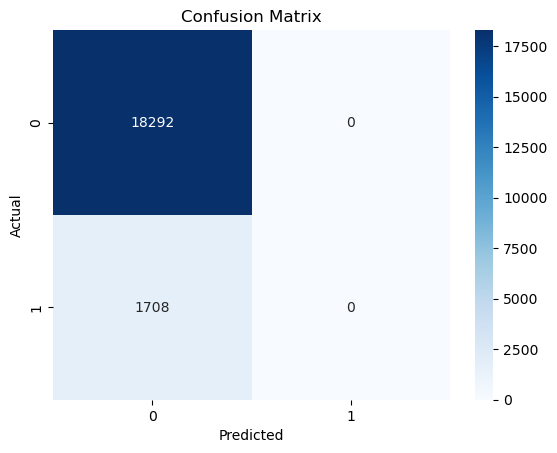

In [271]:
# Create a Confusion Matrix
conf_matrix_logistic = confusion_matrix(y_test, ly_pred)

#Visualize the confusion matrix
sns.heatmap(conf_matrix_logistic, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Model 2: Random Forest

In [256]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [257]:
rf_model.fit(X_train_final, y_train)

RandomForestClassifier(random_state=42)

In [258]:
y_pred_rf = rf_model.predict(X_test_final)

#### Evaluating the Model

In [259]:
# Evaluation metrics
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_rf))

Random Forest
Accuracy: 0.9701
Precision: 0.9475806451612904
Recall: 0.6879391100702577
F1-score: 0.7971506105834464
AUC-ROC: 0.8421928220370969


In [266]:
# Classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



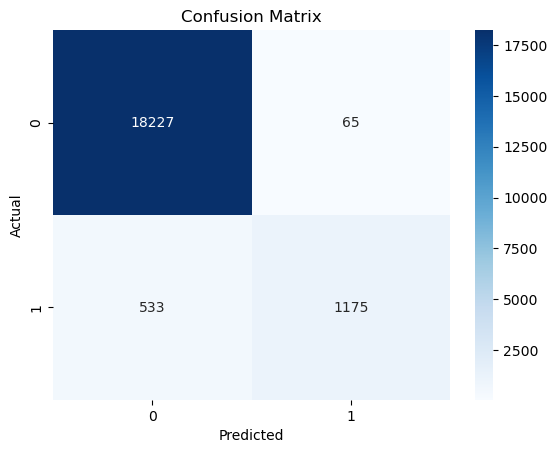

In [273]:
# Create a Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

#Visualize the confusion matrix
sns.heatmap(conf_matrix_rf, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

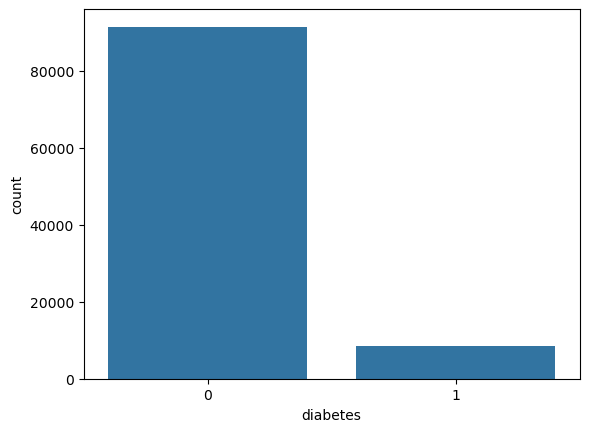

In [263]:
sns.countplot(x='diabetes', data=data);

#### Weighted Average: Averages the precision, recall, and F1-score across all classes, weighted by the number of instances in each class.
     - It takes into account the imbalance in the dataset, giving more weight to the more frequent class (`0` in this case).
     - The weighted averages are higher, reflecting the model's good performance on the more frequent class `0`.

#### Assigning class weights to Logistic model

Logistic Model
Accuracy: 0.93985
Precision: 0.6190476190476191
Recall: 0.7687353629976581
F1-score: 0.68581875163228
AUC-ROC: 0.8622815236156013


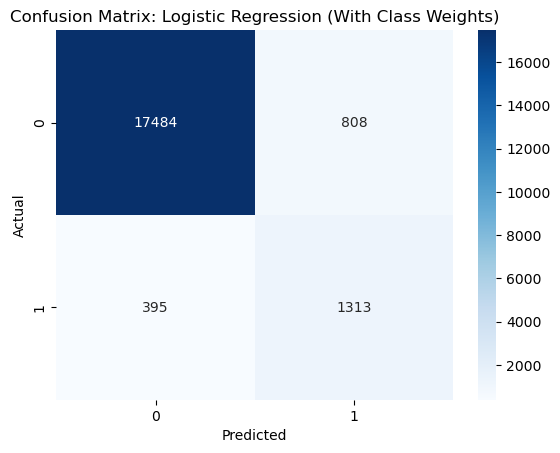

In [272]:
# Train the Logistic Regression model with class weights
logistic_model_weighted = LogisticRegression(random_state=42, max_iter=1000, class_weight={0: 1, 1: 4})
logistic_model_weighted.fit(X_train_final, y_train)

# Make predictions on the test data
y_pred_logistic_weighted = logistic_model_weighted.predict(X_test_final)

# Evaluate the weighted Logistic Regression model
print("Logistic Model")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic_weighted))
print("Precision:", precision_score(y_test, y_pred_logistic_weighted))
print("Recall:", recall_score(y_test, y_pred_logistic_weighted))
print("F1-score:", f1_score(y_test, y_pred_logistic_weighted))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_logistic_weighted))

# Confusion Matrix: Logistic Regression (With Class Weights)
conf_matrix_logistic_weighted = confusion_matrix(y_test, y_pred_logistic_weighted)
sns.heatmap(conf_matrix_logistic_weighted, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression (With Class Weights)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Explanation:

- class_weight={0: 1, 1: 4}: This dictionary assigns a weight of 1 to class 0 and a higher weight of 4 to class 1. The model will thus treat misclassifications of class 1 as 4 times more important than those of class 0.

This encourages the model to focus more on correctly classifying the minority class.

In [ ]:
#### Assigning class weights to Random Forest model

Random Forest Model
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC-ROC: 1.0


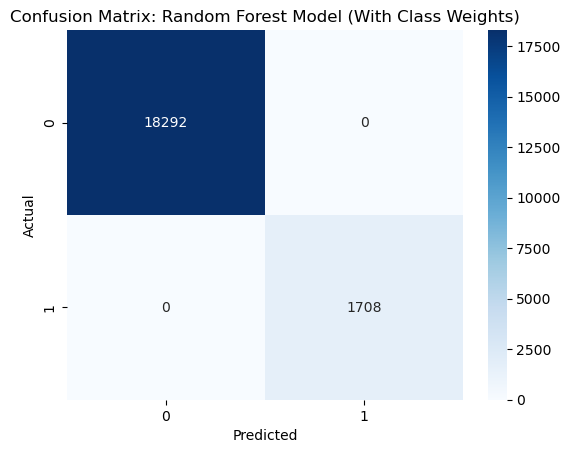

In [275]:
# Train the Random Forest model with class weights
random_forest_model_weighted = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 4})
random_forest_model_weighted.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf_weighted = random_forest_model_weighted.predict(X_test_scaled)

# Evaluate the weighted Random Forest model
print("Random Forest Model")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_weighted))
print("Precision:", precision_score(y_test, y_pred_rf_weighted))
print("Recall:", recall_score(y_test, y_pred_rf_weighted))
print("F1-score:", f1_score(y_test, y_pred_rf_weighted))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_rf_weighted))

# Confusion Matrix: Random Forest Model (With Class Weights)
conf_matrix_rf_weighted = confusion_matrix(y_test, y_pred_rf_weighted)
sns.heatmap(conf_matrix_rf_weighted, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Random Forest Model (With Class Weights)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Logistic Regression with Automatic Class Weights

Logistic Model
Accuracy: 0.8897
Precision: 0.42914058053500287
Recall: 0.882903981264637
F1-score: 0.5775564917656071
AUC-ROC: 0.8866192768776717


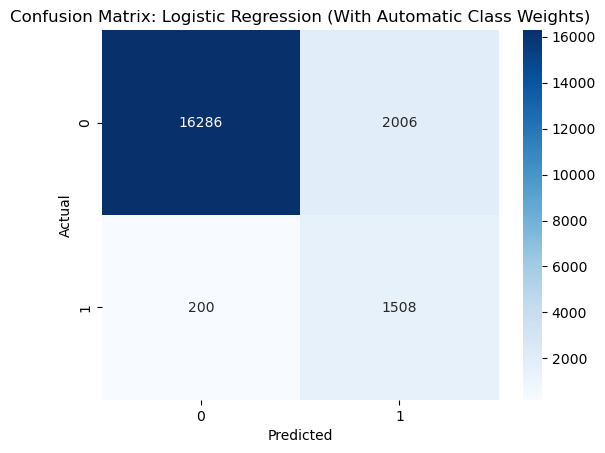

In [276]:
# Train the Logistic Regression model with class weights
logistic_model_weighted = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
logistic_model_weighted.fit(X_train_final, y_train)

# Make predictions on the test data
y_pred_logistic_weighted = logistic_model_weighted.predict(X_test_final)

# Evaluate the weighted Logistic Regression model
print("Logistic Model")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic_weighted))
print("Precision:", precision_score(y_test, y_pred_logistic_weighted))
print("Recall:", recall_score(y_test, y_pred_logistic_weighted))
print("F1-score:", f1_score(y_test, y_pred_logistic_weighted))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_logistic_weighted))

# Confusion Matrix: Logistic Regression (With Class Weights)
conf_matrix_logistic_weighted = confusion_matrix(y_test, y_pred_logistic_weighted)
sns.heatmap(conf_matrix_logistic_weighted, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression (With Automatic Class Weights)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Model 3: Support Vector Machine (SVM)

In [278]:
# Initialize the Support Vector Machine (SVM)
decision_tree_model = DecisionTreeClassifier(random_state=42)

In [279]:
decision_tree_model.fit(X_train_final, y_train)

DecisionTreeClassifier(random_state=42)

In [280]:
y_pred_decision_tree = decision_tree_model.predict(X_test_final)

#### Evaluating the model

In [281]:
# Evaluation metrics
print("Decision Tree Model")
print("Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print("Precision:", precision_score(y_test, y_pred_decision_tree))
print("Recall:", recall_score(y_test, y_pred_decision_tree))
print("F1-score:", f1_score(y_test, y_pred_decision_tree))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_decision_tree))

Decision Tree Model
Accuracy: 0.95285
Precision: 0.7219965177016832
Recall: 0.7283372365339579
F1-score: 0.7251530166132323
AUC-ROC: 0.8510754627891746


In [282]:
# Classification report
print(classification_report(y_test, y_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18292
           1       0.72      0.73      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000



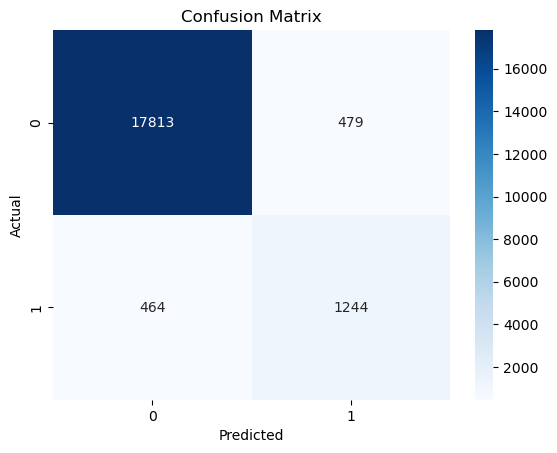

In [283]:
# Create a Confusion Matrix
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

#Visualize the confusion matrix
sns.heatmap(conf_matrix_decision_tree, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [284]:
# Deploying variuos machine learning algorithms
#8 Machine Learning Algorithms will be applied to the dataset

classifiers = [[XGBClassifier(), 'XGB Classifier'],
             [RandomForestClassifier(), 'Random Forest'],
             [KNeighborsClassifier(), 'K-Nearest Neighbors'],
             [SGDClassifier(), 'SGD Classifier'],
             [SVC(), 'SVC'],
             [GaussianNB(), 'Naive Bayes'],
             [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
             [LogisticRegression(), 'Logistic Regression']
             ]

In [287]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train_final, y_train)
    model_name = classifier[1]

    pred = model.predict(X_test_final)

    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)

    acc_list[model_name] = ([str(round(a_score*100,2))+ '%'])
    precision_list[model_name] = ([str(round(p_score*100,2))+ '%'])
    recall_list[model_name] = ([str(round(r_score*100,2))+ '%'])
    roc_list[model_name] = ([str(round(roc_score*100,2))+ '%'])

    if model_name != classifiers[-1][1]:
        print('')

In [288]:
print('Accuracy Score')
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,97.15%,96.98%,96.06%,95.86%,96.07%,29.87%,95.28%,95.9%
